In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('../data/BrentOilPrices.csv')

# Convert Date to datetime and set as index
# The format handles "20-May-87" style dates
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date').set_index('Date')

print(df.head())
print(f"Data range: {df.index.min()} to {df.index.max()}")

C:\Users\Maireg\AppData\Local\Temp\ipykernel_2368\3185883751.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


            Price
Date             
1987-05-20  18.63
1987-05-21  18.45
1987-05-22  18.55
1987-05-25  18.60
1987-05-26  18.63
Data range: 1987-05-20 00:00:00 to 2022-11-14 00:00:00


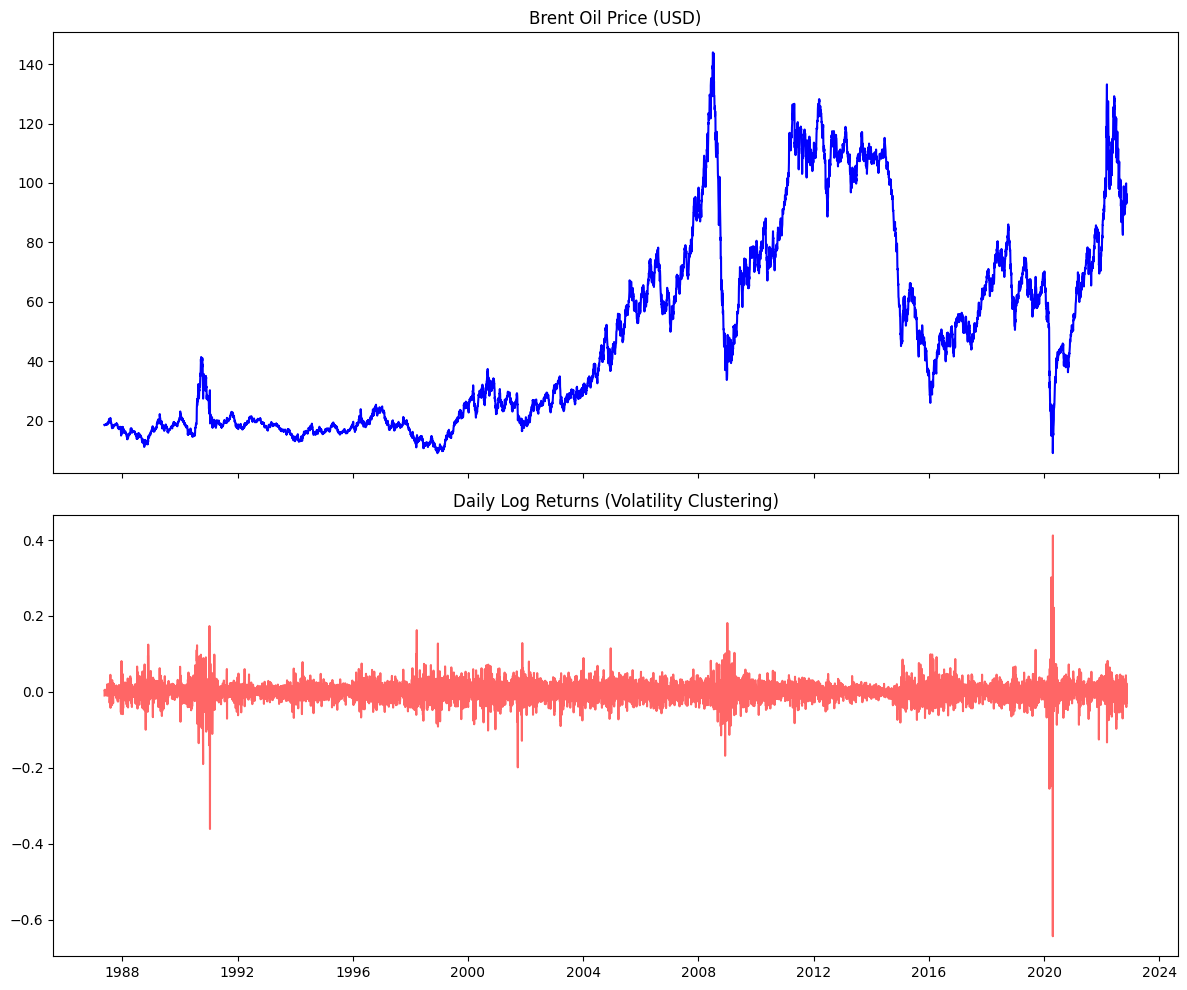

In [4]:
# Calculate Daily Log Returns for stationarity/volatility analysis
df['Log_Return'] = np.log(df['Price'] / df['Price'].shift(1))

# Plot Price and Log Returns
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)
ax1.plot(df['Price'], color='blue')
ax1.set_title('Brent Oil Price (USD)')
ax2.plot(df['Log_Return'], color='red', alpha=0.6)
ax2.set_title('Daily Log Returns (Volatility Clustering)')
plt.tight_layout()
plt.show()

In [5]:
from statsmodels.tsa.stattools import adfuller

def run_adf_test(series, name):
    result = adfuller(series.dropna())
    print(f"--- ADF Test for {name} ---")
    print(f"ADF Statistic: {result[0]:.4f}")
    print(f"p-value: {result[1]:.4f}")
    print("Stationary" if result[1] < 0.05 else "Non-Stationary")
    print("-" * 30)

run_adf_test(df['Price'], "Raw Price")
run_adf_test(df['Log_Return'], "Log Returns")

--- ADF Test for Raw Price ---
ADF Statistic: -1.9939
p-value: 0.2893
Non-Stationary
------------------------------
--- ADF Test for Log Returns ---
ADF Statistic: -16.4271
p-value: 0.0000
Stationary
------------------------------


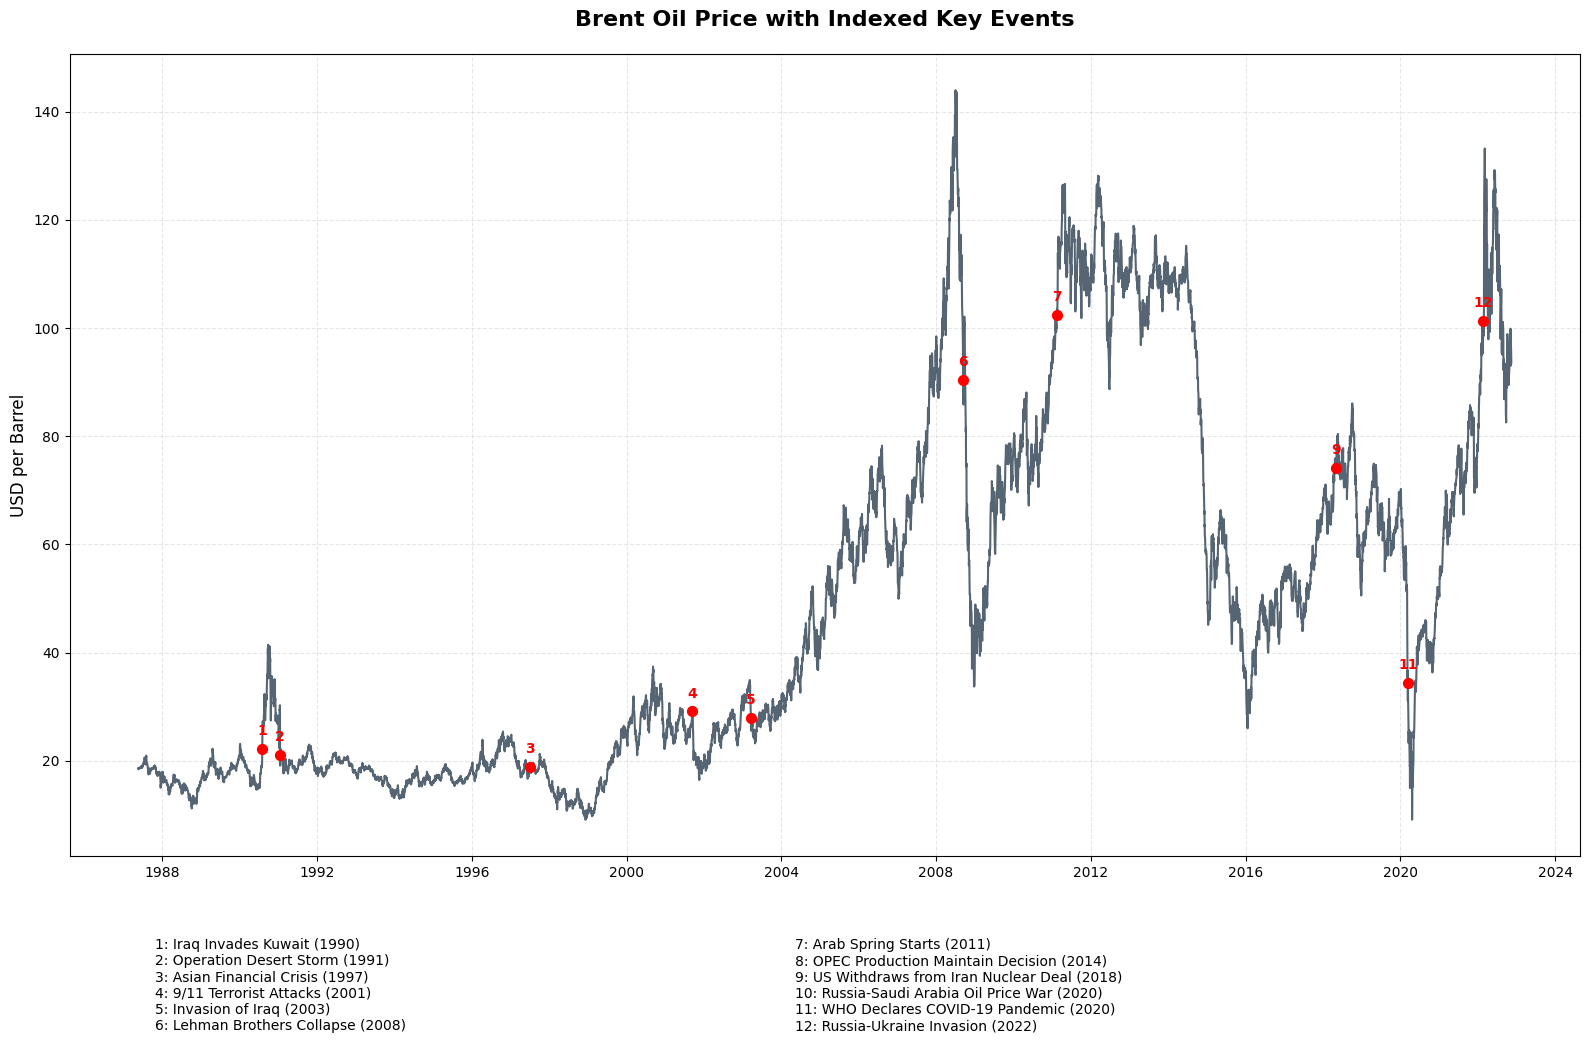

In [9]:
plt.figure(figsize=(16, 9))

# Plot the Price Line
plt.plot(df.index, df['Price'], color='#2c3e50', linewidth=1.5, label='Brent Oil Price', alpha=0.8)

# Define a color palette for event markers
colors = plt.cm.tab20(np.linspace(0, 1, len(events)))

# Plot numbered markers
for i, (_, row) in enumerate(events.iterrows()):
    # Find the price at that date (or the closest available date)
    if row['Date'] in df.index:
        price_at_event = df.loc[row['Date'], 'Price']
        plt.scatter(row['Date'], price_at_event, color='red', s=50, zorder=5)
        plt.annotate(str(i+1), (row['Date'], price_at_event), 
                     textcoords="offset points", xytext=(0,10), 
                     ha='center', fontsize=10, fontweight='bold', color='red')

# Formatting
plt.title('Brent Oil Price with Indexed Key Events', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('USD per Barrel', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.3)

# Create a clean legend below the plot
event_legend = [f"{i+1}: {row['Event']} ({row['Date'].year})" for i, row in events.iterrows()]
plt.figtext(0.1, -0.15, "\n".join(event_legend[:6]), fontsize=10, ha='left')
plt.figtext(0.5, -0.15, "\n".join(event_legend[6:]), fontsize=10, ha='left')

plt.tight_layout()
plt.show()

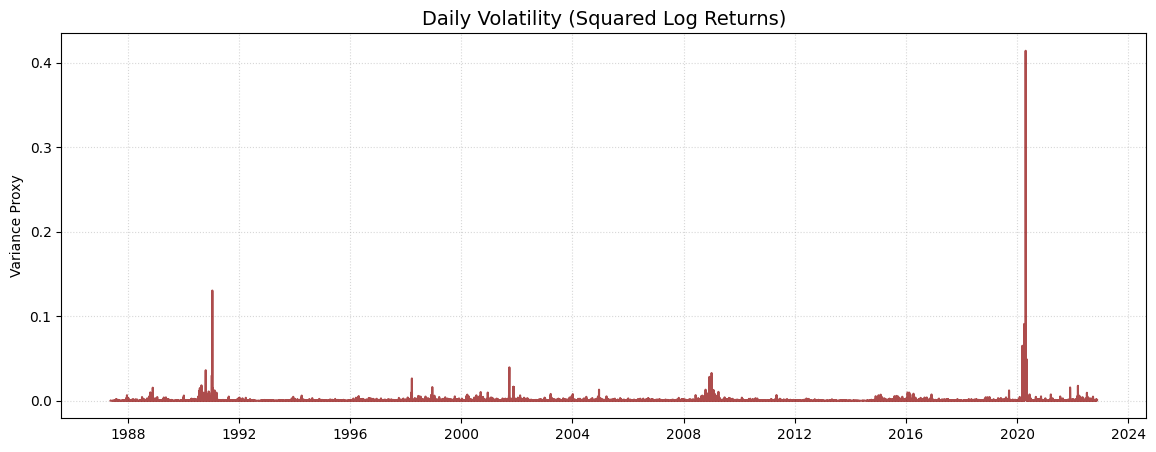

High variance clusters usually correspond to major geopolitical shocks identified in Task 1.


In [10]:
plt.figure(figsize=(14, 5))
plt.plot(df.index, df['Log_Return']**2, color='darkred', alpha=0.7)
plt.title('Daily Volatility (Squared Log Returns)', fontsize=14)
plt.ylabel('Variance Proxy')
plt.grid(True, linestyle=':', alpha=0.5)
plt.show()

print("High variance clusters usually correspond to major geopolitical shocks identified in Task 1.")

In [12]:
# Save processed data for Task 2
df.to_csv('../data/processed_brent_prices.csv')
print("Processed data saved to data/processed_brent_prices.csv")

Processed data saved to data/processed_brent_prices.csv


In [2]:
import os
import pandas as pd

# Check if we are in 'notebooks' and need to go up, or in root
path = 'data' if os.path.exists('data') else '../data'
if not os.path.exists(path):
    os.makedirs(path)

events_data = [
    {"date": "1990-08-02", "event": "Iraq Invades Kuwait", "impact": "Supply Shock"},
    {"date": "1997-07-02", "event": "Asian Financial Crisis", "impact": "Demand Drop"},
    {"date": "2001-09-11", "event": "9/11 Attacks", "impact": "Uncertainty"},
    {"date": "2008-09-15", "event": "Lehman Brothers Collapse", "impact": "Global Recession"},
    {"date": "2011-02-15", "event": "Arab Spring Starts", "impact": "Supply Disruption"},
    {"date": "2014-11-27", "event": "OPEC Production Decision", "impact": "Price War"},
    {"date": "2020-03-11", "event": "COVID-19 Pandemic", "impact": "Demand Collapse"},
    {"date": "2022-02-24", "event": "Russia-Ukraine Invasion", "impact": "Sanctions/Supply"}
]

save_path = os.path.join(path, 'events.csv')
pd.DataFrame(events_data).to_csv(save_path, index=False)
print(f"File saved successfully to: {save_path}")

File saved successfully to: ../data\events.csv


In [3]:
if os.path.exists(save_path):
    print("Verification Successful: events.csv is ready.")
else:
    print("Verification Failed: File still missing.")

Verification Successful: events.csv is ready.


c:\Users\Maireg\Documents\GitHub\brent-oil-change-point-analysis\src\scripts\data_utils.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


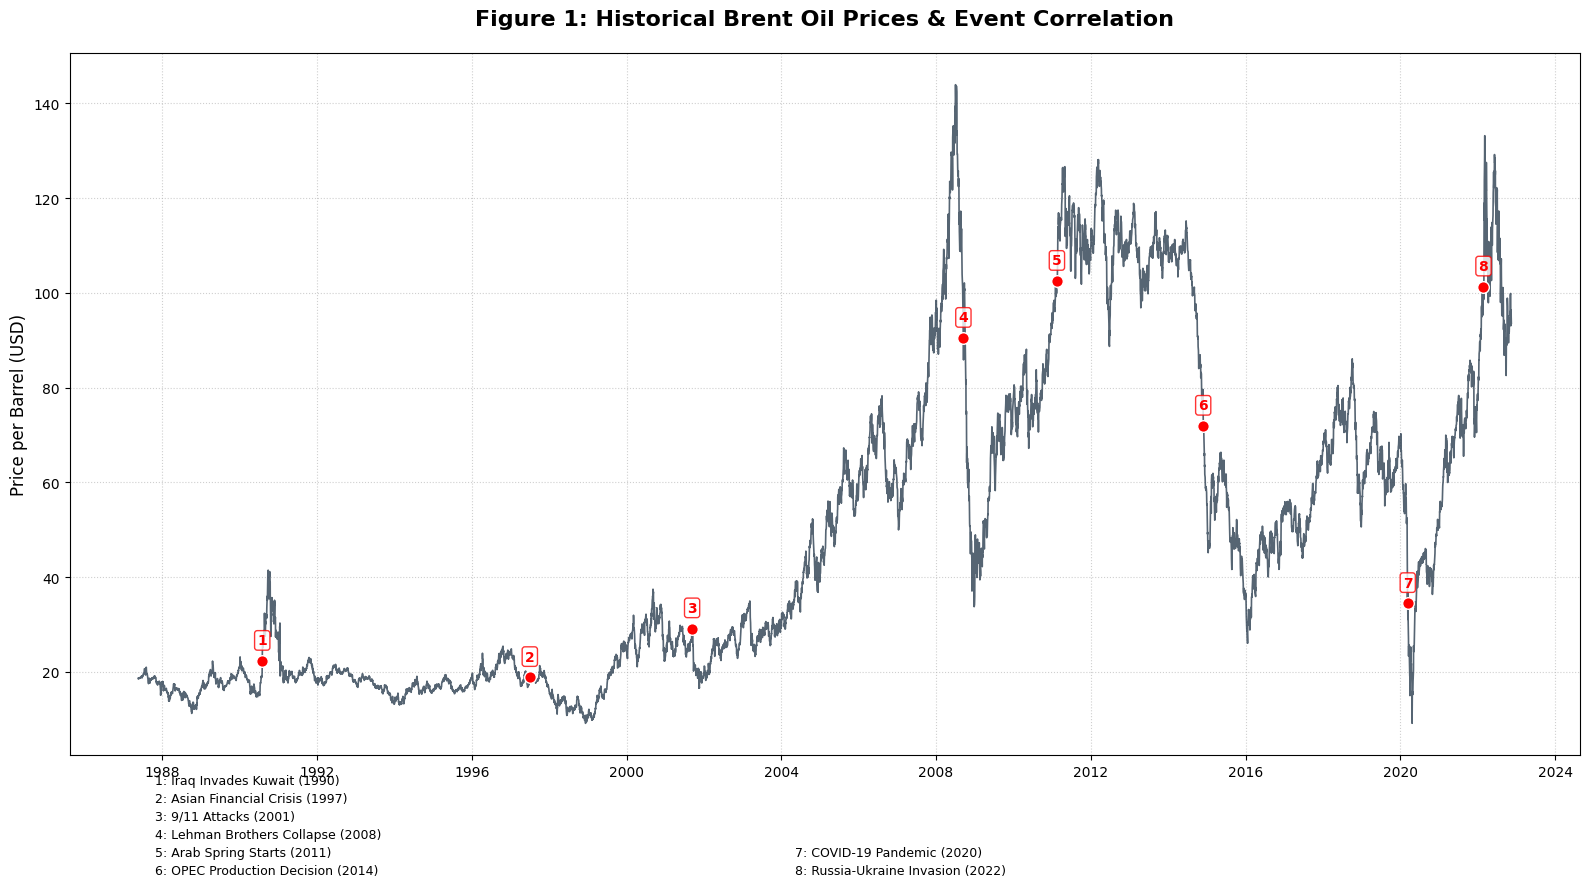

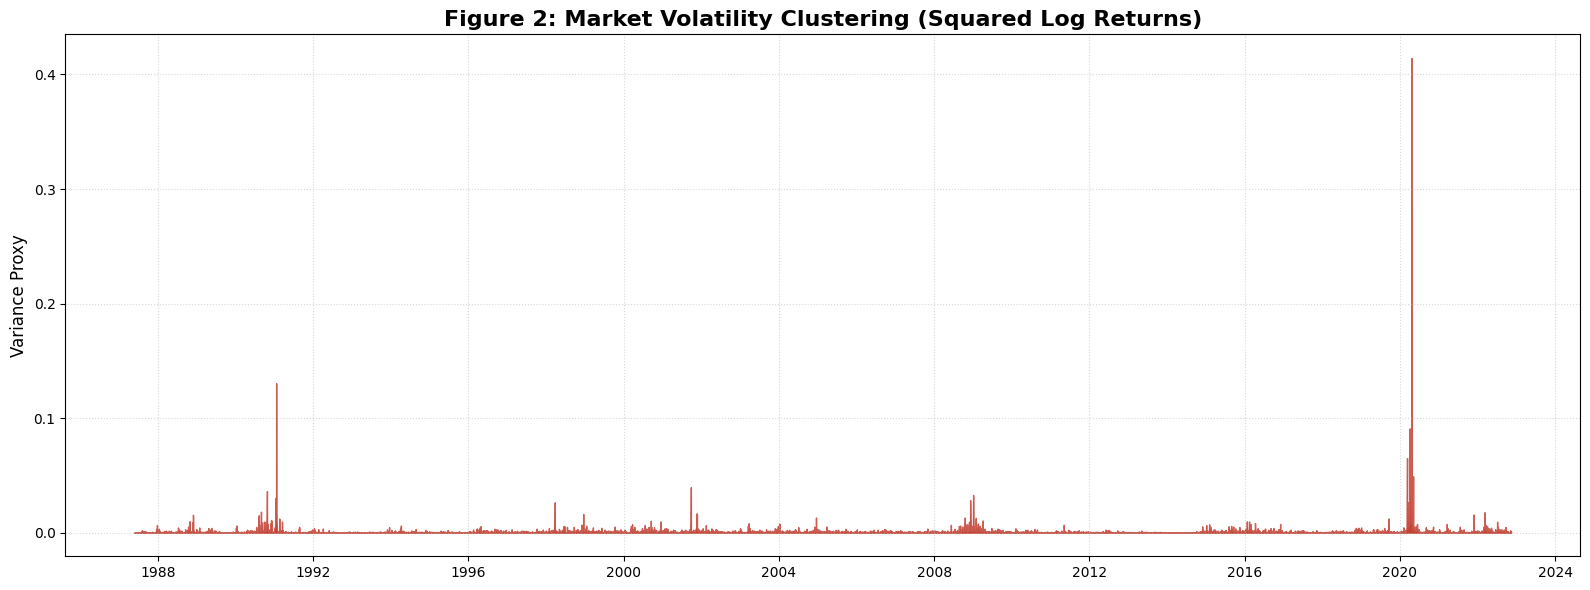

In [4]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure path to src is included
sys.path.append(os.path.abspath('../src'))
from scripts.data_utils import load_and_preprocess_data, get_log_returns

# 1. Load Data
df = load_and_preprocess_data('../data/BrentOilPrices.csv')
events = pd.read_csv('../data/events.csv')
events['date'] = pd.to_datetime(events['date'])

# 2. FIGURE 1: Price Evolution with Indexed Events
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Price'], color='#2c3e50', linewidth=1.2, alpha=0.8, label='Brent Oil Price (USD)')

# Overlay numbered markers for events
for i, row in events.iterrows():
    if row['date'] in df.index:
        y_val = df.loc[row['date'], 'Price']
    else:
        # Fallback for weekends/missing dates
        idx = df.index.get_indexer([row['date']], method='nearest')[0]
        y_val = df.iloc[idx]['Price']
    
    plt.scatter(row['date'], y_val, color='red', s=70, edgecolors='white', zorder=5)
    plt.annotate(str(i+1), (row['date'], y_val), xytext=(0,12), 
                 textcoords="offset points", ha='center', fontsize=10, 
                 fontweight='bold', color='red', 
                 bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', alpha=0.8))

plt.title('Figure 1: Historical Brent Oil Prices & Event Correlation', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price per Barrel (USD)', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)

# Add Legend box for events at bottom
event_labels = [f"{i+1}: {row['event']} ({row['date'].year})" for i, row in events.iterrows()]
plt.figtext(0.1, -0.1, "\n".join(event_labels[:6]), fontsize=9, linespacing=1.5)
plt.figtext(0.5, -0.1, "\n".join(event_labels[6:]), fontsize=9, linespacing=1.5)

plt.tight_layout()
plt.savefig('../docs/figure1_price_events.png', dpi=300, bbox_inches='tight')
plt.show()

# 3. FIGURE 2: Volatility Clustering
log_returns = get_log_returns(df)
plt.figure(figsize=(16, 6))
plt.fill_between(log_returns.index, log_returns**2, color='#c0392b', alpha=0.8)
plt.title('Figure 2: Market Volatility Clustering (Squared Log Returns)', fontsize=16, fontweight='bold')
plt.ylabel('Variance Proxy', fontsize=12)
plt.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.savefig('../docs/figure2_volatility.png', dpi=300, bbox_inches='tight')
plt.show()

c:\Users\Maireg\Documents\GitHub\brent-oil-change-point-analysis\src\scripts\data_utils.py:12: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')


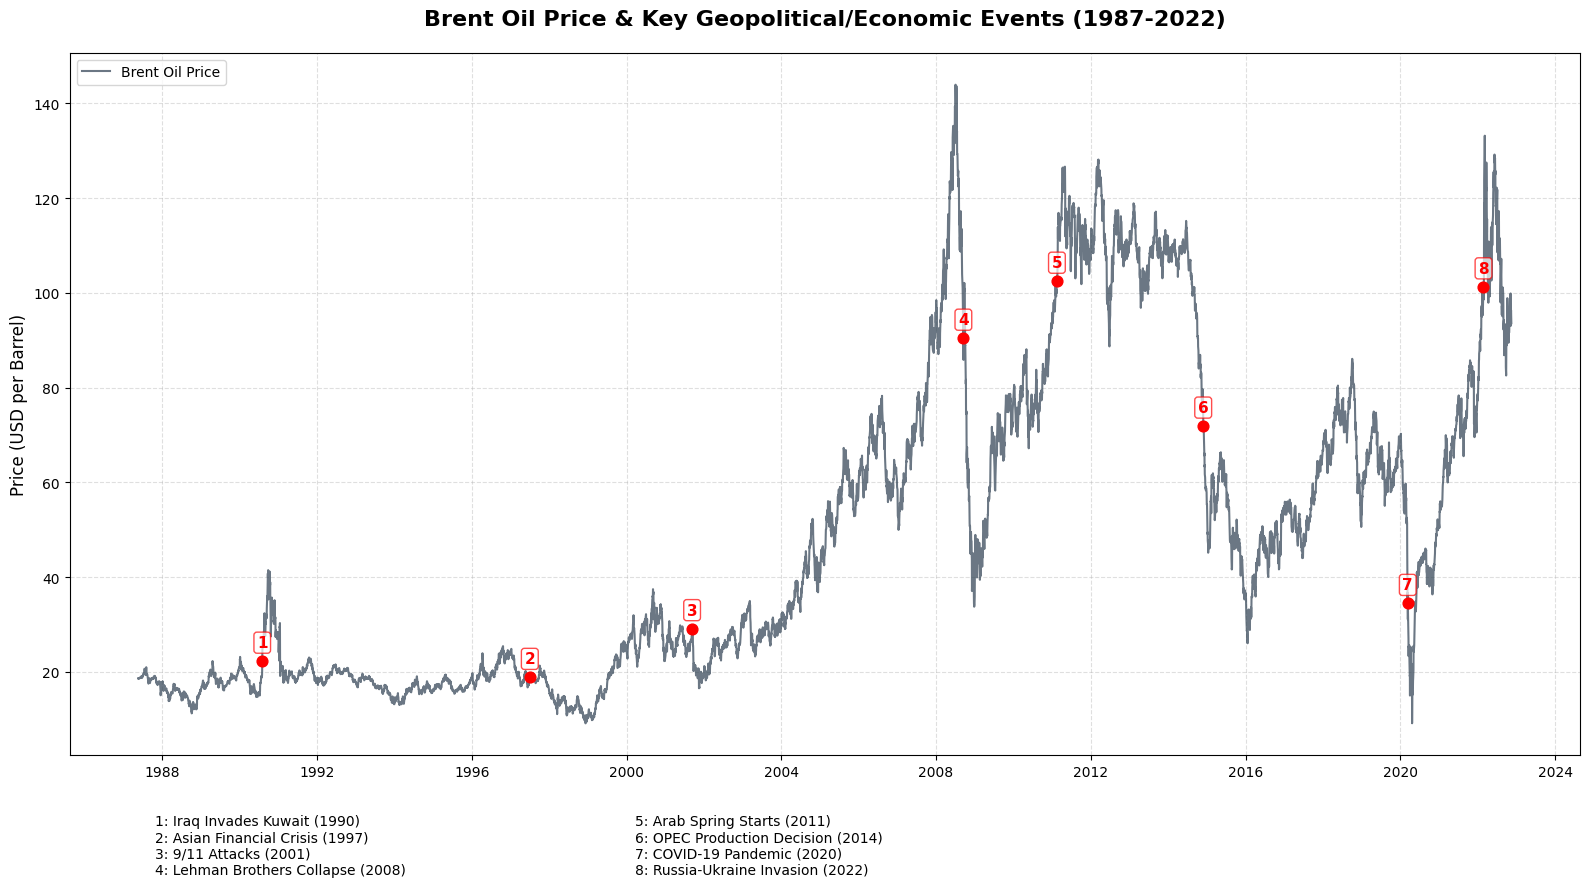

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os

# Ensure we can import from src
sys.path.append(os.path.abspath('../src'))
from scripts.data_utils import load_and_preprocess_data

# 1. Load Data
df = load_and_preprocess_data('../data/BrentOilPrices.csv')
events = pd.read_csv('../data/events.csv')
events['date'] = pd.to_datetime(events['date'])

# 2. Setup Plot
plt.figure(figsize=(16, 8))
plt.plot(df.index, df['Price'], color='#2c3e50', linewidth=1.5, alpha=0.7, label='Brent Oil Price')

# 3. Overlay Numbered Events
for i, row in events.iterrows():
    # Find closest price for the event date to place the marker
    if row['date'] in df.index:
        event_price = df.loc[row['date'], 'Price']
    else:
        # If exact date missing (e.g. weekend), find the nearest available date
        nearest_date = df.index[df.index.get_indexer([row['date']], method='nearest')[0]]
        event_price = df.loc[nearest_date, 'Price']
    
    plt.scatter(row['date'], event_price, color='red', s=60, zorder=5)
    plt.annotate(str(i+1), (row['date'], event_price), xytext=(0,10), 
                 textcoords="offset points", ha='center', fontsize=11, 
                 fontweight='bold', color='red', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='red', alpha=0.7))

# 4. Styling
plt.title('Brent Oil Price & Key Geopolitical/Economic Events (1987-2022)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Price (USD per Barrel)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.4)
plt.legend(loc='upper left')

# 5. Legend description list at the bottom
event_list = [f"{i+1}: {row['event']} ({row['date'].year})" for i, row in events.iterrows()]
plt.figtext(0.1, -0.1, "\n".join(event_list[:4]), fontsize=10, ha='left')
plt.figtext(0.4, -0.1, "\n".join(event_list[4:8]), fontsize=10, ha='left')

plt.tight_layout()
plt.savefig('../docs/price_event_plot.png', bbox_inches='tight', dpi=300)
plt.show()

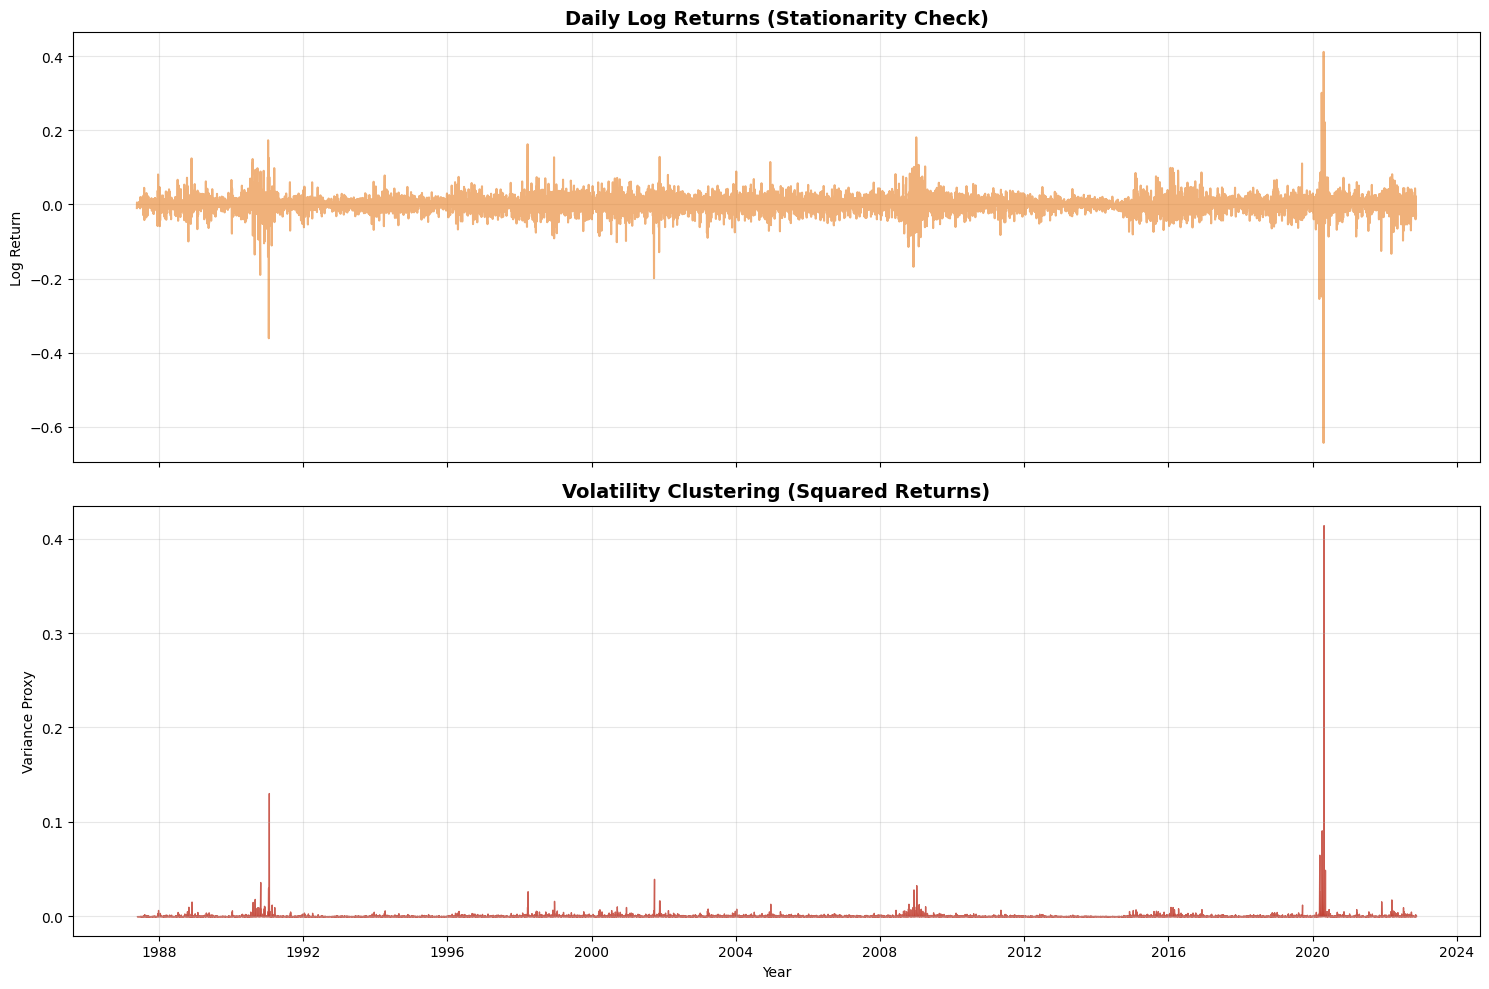

In [7]:
from scripts.data_utils import get_log_returns

# 1. Calculate Log Returns
log_returns = get_log_returns(df)

# 2. Setup Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Top Plot: Log Returns (Standardized View)
ax1.plot(log_returns.index, log_returns, color='#e67e22', alpha=0.6)
ax1.set_title('Daily Log Returns (Stationarity Check)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Log Return')
ax1.grid(True, alpha=0.3)

# Bottom Plot: Volatility (Squared Returns)
ax2.fill_between(log_returns.index, log_returns**2, color='#c0392b', alpha=0.8)
ax2.set_title('Volatility Clustering (Squared Returns)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Variance Proxy')
ax2.set_xlabel('Year')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../docs/volatility_clustering.png', dpi=300)
plt.show()